In [1]:

import os


import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import tensorflow as tf

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

import cv2
import imghdr

OSError: [WinError 182] The operating system cannot run %1. Error loading "C:\Users\sud4d\anaconda3\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [5]:

data_dir = 'immages' 
image_exts = ['jpeg','jpg', 'bmp', 'png']


os.listdir(data_dir)

['0', '1']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

class Customdata(torch.utils.data.Dataset):
  def __init__(self,tset,transform=None):
    self.dat=tset
    self.transform=transform
  def __len__(self):
    return len(self.dat)
  def __getitem__(self,index):
    #if self.transform:
    #  img=self.transform(self.dat[index][0])
    return (self.dat[index][0],self.dat[index][1])

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 435 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()


In [9]:
transform = torchvision.transforms.Resize(size = (32,32))
img,lbl=next(data_iterator)
img[0].shape,lbl.shape,np.transpose(transform(torch.tensor(np.transpose(img[0],(2,0,1)))).numpy(),(1,2,0))[0:10,0:10,:].shape,
#plt.imshow(img[0])

C:\Users\sud4d\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


((256, 256, 3), (32,), (10, 10, 3))

In [1]:
#temp=np.transpose(transform(torch.tensor(np.transpose(img[0]/255,(2,0,1)))).numpy(),(1,2,0))[0:10,0:10,:]
plt.imshow(np.transpose(img[0]/255,(0,1,2)))

NameError: name 'plt' is not defined

In [8]:



def getdataset(data):
    data_iterator=data.as_numpy_iterator()
    tset=[]
    transform = torchvision.transforms.Resize(size = (32,32))
    while True:
        try:
            imgbatch,lblbatch=next(data_iterator)
            for i in range(len(lblbatch)):
                #tset.append((imgbatch[i]/255,lblbatch[i]))
                
                t=torch.tensor(imgbatch[i]/255)
                print('v')
                print(imgbatch[i].shape)
                ttt=transform(torch.tensor(np.transpose(t.numpy(),(2,0,1))))
                print(ttt.shape)
                plt.imshow(np.transpose(ttt.numpy(),(1,2,0)))
                #plt.imshow(imgbatch[i]/255)
                plt.show()
                tset.append((ttt,lblbatch[i]))
                #print(t.shape)
        except:
            print('a')
            break
    return tset

In [ ]:
tset=getdataset(data)


C:\Users\sud4d\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 32, 32])


In [1]:
batch_size=8
train=Customdata(tset)
trainloader=torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True)

NameError: name 'Customdata' is not defined

In [ ]:
im,lb=next(iter(trainloader))

In [272]:
im.shape,lb.shape

(torch.Size([8, 3, 32, 32]), torch.Size([8]))

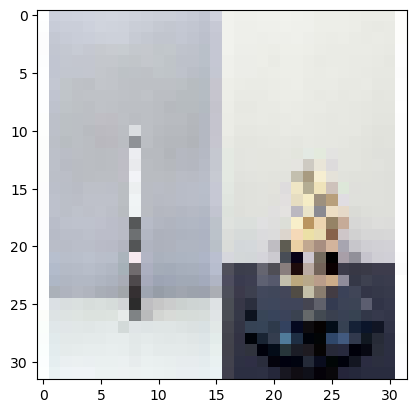

In [273]:
plt.imshow(np.transpose(im[2].numpy(),(1,2,0)))

In [107]:
"""""""""""""""
transform = torchvision.transforms.Resize(size = (32,32))
tset=[]
#fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    print(idx)
    t=torch.tensor(img/255)
    ttt=transform(torch.tensor(np.transpose(t.numpy(),(2,0,1))))
    plt.imshow(np.transpose(ttt.numpy(),(1,2,0)))
    plt.title(batch[1][idx])
    plt.show()
    
    
t.shape
"""""""""""""""

'\ntransform = torchvision.transforms.Resize(size = (32,32))\ntset=[]\n#fig, ax = plt.subplots(ncols=4, figsize=(20,20))\nfor idx, img in enumerate(batch[0][:20]):\n    print(idx)\n    t=torch.tensor(img/255)\n    ttt=transform(torch.tensor(np.transpose(t.numpy(),(2,0,1))))\n    plt.imshow(np.transpose(ttt.numpy(),(1,2,0)))\n    plt.title(batch[1][idx])\n    plt.show()\n    \n    \nt.shape\n'

In [274]:
class CIFAR(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1),nn.ReLU(),nn.Dropout(0.3),
                             nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1),nn.ReLU(),nn.MaxPool2d(kernel_size=(2, 2)),
                             nn.Flatten(),nn.Linear(8192, 512),nn.ReLU(),nn.Dropout(0.5),nn.Linear(512, 2),nn.Sigmoid())
  def forward(self,x):
    output=self.model(x)
    return output

  def trainer(self,dataloader):
    epochs=10
    lr=0.01
    momentum=0.9
    #lossfunction=nn.NLLLoss()#for classifying problems with 'c' number of classes
    lossfunction=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(self.model.parameters(),lr=lr,momentum=momentum)
    for i in range(epochs):
      runningloss=0
      tem=0
      for images,labels in dataloader:
        images=images.view(images.shape[0],3,32,32)#tensor from [batchsize,1,28,28] to [batchsize,28*28] ==> flatten images
        #print(tem)
        tem=tem+1

        optimizer.zero_grad()
        out=self.model(images)#applies model to each image in batch and return label list for the batch
        #print(out)
        labels=labels.long()
        #print(labels)
        loss=lossfunction(out,labels)#each image in batch==> {out[i][0],out[i][1]...out[i][c] }==> should have class given in labels[i] i.e out[i][labels[i]] should be 1
        loss.backward()
        optimizer.step()
        #print(loss)
        #print("###########")
        runningloss += loss.item()
      print("epoch: "+str(i)+" : loss= "+str(runningloss))

  def tester(self,dataloader):
    correct,all=0,0
    for images,labels in dataloader:
      for i in range(len(labels)):
        img=images[i].view(1,3,32,32)
        with torch.no_grad():
          outs=self.model(img)
        pred=torch.exp(outs).numpy().argmax(axis=1)
        if pred== labels.numpy()[i]:
          correct +=1
        all +=1
    print("All= "+str(all)+"; correct= "+str(correct)+"; Accuracy= "+str(correct/all))

  def unlearn(self,classtoforget):
    return None


classes = ('object','face')
def ploter(model,dataloader,n):
  iterr=iter(dataloader)
  for i in range(n**2):
    img,lbl=next(iterr)
    #for i in range(len(lbl)):
    #  imgs=img[i]#.view(1,-1)
    #  print(imgs.shape)
    #print(img[0].shape)
    with torch.no_grad():
      outs=model(img)
      #print(outs.shape)
      #print(torch.argmax(outs, 1) )
      outs=torch.argmax(outs, 1)
    img=torchvision.utils.make_grid(img)
    #img=img / 2 + 0.5
    print(np.transpose(img.numpy(),(1,2,0)).shape)
    plt.imshow(np.transpose(img.numpy(),(1,2,0)))
    plt.show()
    p=''
    m=''
    for j in range(len(lbl)):
      p=p+str(classes[lbl[j]])+"; "
      m=m+str(classes[outs[j]])+";"
    print(str(i)+": p= "+str(p))
    print(str(i)+": m= "+str(m))

In [275]:
model2=CIFAR()
model2.trainer(trainloader)

epoch: 0 : loss= 38.072026908397675
epoch: 1 : loss= 37.80419498682022
epoch: 2 : loss= 37.52642595767975
epoch: 3 : loss= 36.42222023010254
epoch: 4 : loss= 34.9323533475399
epoch: 5 : loss= 33.286119908094406
epoch: 6 : loss= 30.939864963293076
epoch: 7 : loss= 35.45611408352852
epoch: 8 : loss= 35.44624128937721
epoch: 9 : loss= 30.372053116559982


In [276]:
model2.tester(trainloader)

All= 435; correct= 336; Accuracy= 0.7724137931034483


(36, 274, 3)


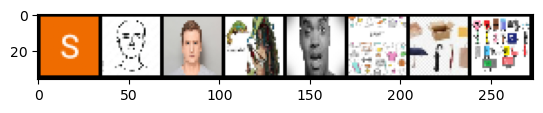

0: p= face; face; face; object; face; object; object; object; 
0: m= face;object;face;face;face;object;face;object;
(36, 274, 3)


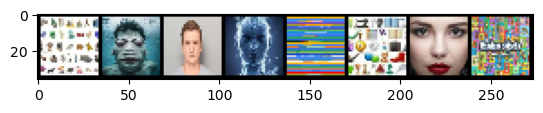

1: p= object; face; face; face; face; object; face; object; 
1: m= object;face;face;object;object;object;face;object;
(36, 274, 3)


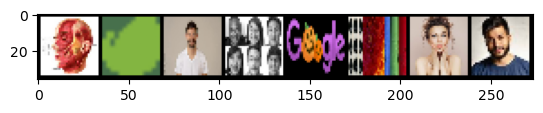

2: p= face; object; face; face; object; object; face; face; 
2: m= face;face;object;object;face;face;face;face;
(36, 274, 3)


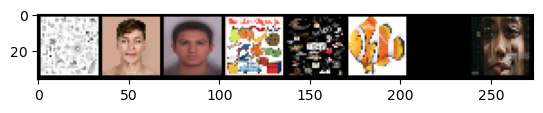

3: p= object; face; face; object; object; object; face; face; 
3: m= object;face;face;face;face;face;face;face;


In [277]:
ploter(model2,trainloader,2)